In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("/content/SolarPrediction.csv")

In [5]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

from sklearn.model_selection import train_test_split

import xgboost as xgb

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [6]:

df['Data']=df['Data'].apply(lambda x: x.split()[0])

In [7]:
df['Month']=pd.to_datetime(df['Data']).dt.month
df['Day']=pd.to_datetime(df['Data']).dt.day
df['Year']=pd.to_datetime(df['Data']).dt.year
df['Hour']=pd.to_datetime(df['Time']).dt.hour
df['Minute']=pd.to_datetime(df['Time']).dt.minute
df['Second']=pd.to_datetime(df['Time']).dt.second

In [8]:
df['SunriseHour']=df['TimeSunRise'].apply(lambda x: re.search(r'^\d+',x).group(0)).astype(int)
df['SunriseMinute']=df['TimeSunRise'].apply(lambda x: re.search(r':(\d+)',x).group(1)).astype(int)
df['SunsetHour']=df['TimeSunSet'].apply(lambda x: re.search(r':(\d+)',x).group(1)).astype(int)
df['SunsetMinute']=df['TimeSunSet'].apply(lambda x: re.search(r':(\d+)',x).group(1)).astype(int)

In [9]:
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [10]:
df.isnull().sum().sum()

0

In [11]:
input_features=df.drop(['Radiation'],axis=1)
output_features=df['Radiation']

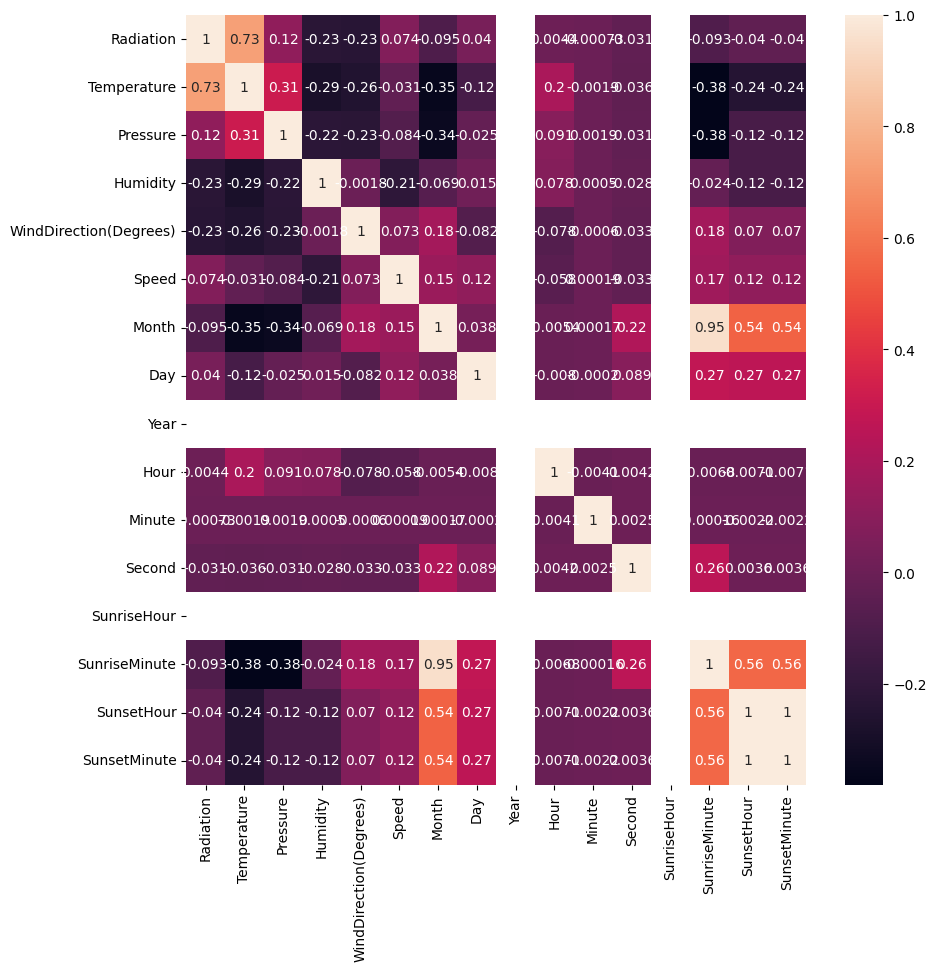

In [12]:
cor=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.show()

In [13]:
del df

In [14]:
output_features=output_features.apply(lambda x: int(x*100))


In [15]:
scalar=MinMaxScaler()
scaled_input_features=scalar.fit_transform(input_features)
input_features_columns=input_features.columns


In [16]:
feature_selector= SelectKBest(chi2,k='all')
selected_features=feature_selector.fit(scaled_input_features,output_features)

In [17]:
imp=pd.DataFrame(selected_features.scores_,index=input_features_columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False, inplace=True)
imp

,Importance
Month,4684.579610
SunriseMinute,4015.062771
WindDirection(Degrees),3271.827277
Day,2841.926850
Minute,2702.449333
Second,2288.673032
SunsetHour,1863.712087
SunsetMinute,1863.712087
Temperature,1651.685632
Humidity,1588.087433


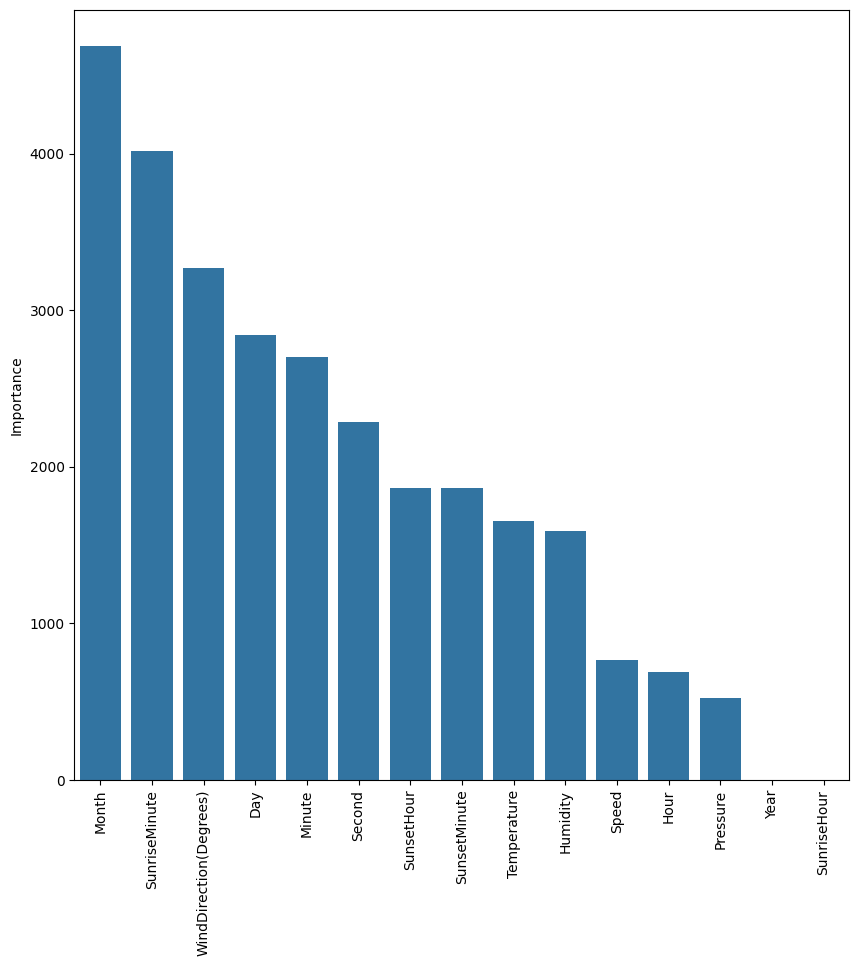

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(imp.Importance)
plt.xticks(rotation=90)
plt.show()
